In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

### User-defined parameters

In [2]:
#Models to plot
models=('ECMF','NCEP','JMA')
# Spatial domain
nla=80 	# Northernmost latitude
sla=-60 	# Southernmost latitude
wlo=0 	# Westernmost longitude
elo=360 	# Easternmost longitude
#Forecast initialization: (only Thursdays to be able to compare between models)
iyr=2020
imn='Aug'
idy=27
#Lead time window:
title='Week 3-4'
Li=14
Lf=28

In [3]:
def download_data(url, authkey, outfile, force_download=False):
    """A function to download data from IRI Data Library
    If the data can be read in and force_download is False, will read from file
    Otherwise will download from IRIDL and then read from file
    
    PARAMETERS
    ----------
        url: the url pointing to the data.nc file
        authkey: the authentication key for IRI DL (see above)
        outfile: the data filename
        force_download: False if it's OK to read from file, True if data *must* be re-downloaded
    """
    
    if not force_download:
        try:
            model = xr.open_dataset(outfile, decode_times=False)
        except:
            force_download = True
        
    if force_download:
        # calls curl to download data
        command = "curl -L -k -b '__dlauth_id={}' '{}' > {}".format(authkey, url, outfile)
        #command = "curl -L '{}' > {}".format(url, outfile)
        get_ipython().system(command)
        # open the data
        data = xr.open_dataset(outfile, decode_times=False)
        
    return data

with open('.IRIDLAUTH') as file:
    authkey = file.read() 

In [4]:
!mkdir -p data

In [6]:
anom=[]
for imo in models:
    LL='L'
    if imo=='NCEP':
        LL='L1'
    url='http://iridl.ldeo.columbia.edu/SOURCES/.ECMWF/.S2S/.'+imo+'/.forecast/.perturbed/.sfc_precip/.tp/S/(0000%20'+str(idy)+'%20'+str(imn)+'%20'+str(iyr)+')/VALUES/%5BM%5Daverage/'+LL+'/('+str(Li)+')/('+str(Lf)+')/VALUES/%5B'+LL+'%5Ddifferences/SOURCES/.ECMWF/.S2S/.climatologies/.hindcast/.'+imo+'/.tpSmooth/'+LL+'/('+str(Li)+')/('+str(Lf)+')/VALUES/%5B'+LL+'%5Ddifferences/S/pentadAverage/S/pentadmean/%5BS%5DregridLinear/sub/c%3A//name//water_density/def/998/(kg/m3)/%3Ac/div/(mm)/unitconvert/X/('+str(wlo)+')/('+str(elo)+')/RANGE/Y/('+str(sla)+')/('+str(nla)+')/RANGE/data.nc'
    if imo=='JMA':
        url='http://iridl.ldeo.columbia.edu/SOURCES/.ECMWF/.S2S/.'+imo+'/.forecast/.perturbedM49/.sfc_precip/.tp/S/(1200%20'+str(idy-1)+'%20'+str(imn)+'%20'+str(iyr)+')/VALUES/%5BM%5Daverage/'+LL+'/('+str(Li)+')/('+str(Lf)+')/VALUES/%5B'+LL+'%5Ddifferences/SOURCES/.ECMWF/.S2S/.climatologies/.hindcast/.'+imo+'/.tpSmooth/'+LL+'/('+str(Li)+')/('+str(Lf)+')/VALUES/%5B'+LL+'%5Ddifferences/S/pentadAverage/S/pentadmean/%5BS%5DregridLinear/sub/c%3A//name//water_density/def/998/(kg/m3)/%3Ac/div/(mm)/unitconvert/X/('+str(wlo)+')/('+str(elo)+')/RANGE/Y/('+str(sla)+')/('+str(nla)+')/RANGE/data.nc'
        
    print(imo)
    anom.append(download_data(
        url=url,
        outfile='data/fcst_anom_'+imo+'.nc', 
        authkey=authkey,
        force_download=True))
    print()
    print()

ECMF
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 94120  100 94120    0     0  45622      0  0:00:02  0:00:02 --:--:-- 45622


NCEP
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 94120  100 94120    0     0  48143      0  0:00:01  0:00:01 --:--:-- 48118


JMA
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 94220  100 94220    0     0   7154      0  0:00:13  0:00:13 --:--:-- 23944  0 --:--:--  0:00:02 --:--:--     0-  0:00:05 --:--:--     0




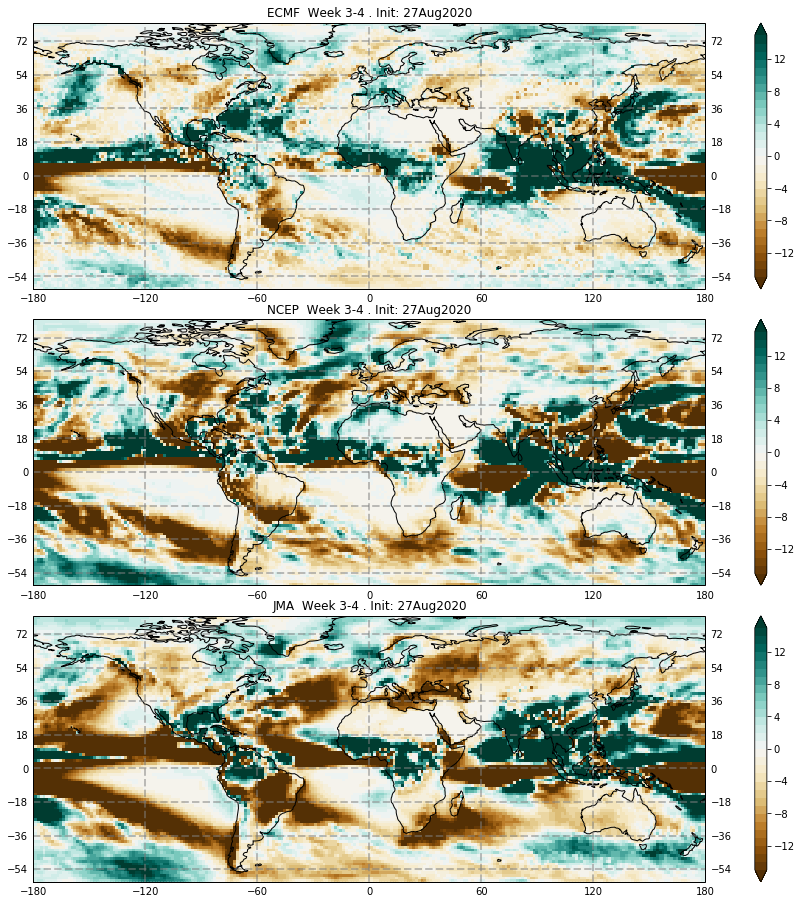

In [8]:
fig, axes = plt.subplots(ncols=1,nrows=len(models),figsize=(14, 12.5),subplot_kw={'projection': ccrs.PlateCarree()}, 
        sharex=True)
for i in range(len(models)):
    ax=axes[i]
    anom[i]['ratio'].squeeze().plot.pcolormesh(ax=ax,transform=ccrs.PlateCarree(), 
                                               x='X', y='Y', 
                                               add_colorbar=True,
                                               add_labels=False,
                                               cmap = 'BrBG',
                                               extend="both",
                                               levels=np.linspace(-15, 15, 31)
                                              );
    ax.coastlines();
    gl=ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    ax.set_title(models[i]+"  "+title+" . Init: "+str(idy)+str(imn)+str(iyr))
plt.tight_layout()